# Proyecto

## Importación de las librerias y carga del dataset 

In [1]:
# Importación de las librerias 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from graphs import plotDecisionTree
from metric import classificationSummary
import pickle
import sklearn.metrics as sm
from tkinter import *
from tkinter import messagebox, ttk
import tkinter as tk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos en el entorno de Python
inec_df = pd.read_csv('inec-2020.csv',low_memory=False)

In [3]:
inec_df.head()

,Numeración,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,sexo,anio_fall,...,lug_viol,prov_res,area_res,causa,lc1,causa103,causa80,causa67A,causa67B,residente
0,60264,Guayas,Guayaquil,Rocafuerte,2020,Noviembre,26,26/11/2020,Hombre,2020,...,Sin información,Guayas,Urbana,Y24 Disparo de otras armas de fuego-y las no...,65 Eventos de intención no determinada,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Residente
1,108360,Santa Elena,Santa Elena,Santa Elena,2020,Diciembre,8,08/12/2020,Hombre,2020,...,,Esmeraldas,Urbana,R99 Otras causas mal definidas y las no espe...,99 Causas mal definidas,094 Sintomas-signos y hallazgos anormales clí...,071 Sintoms-signs y hallz anorm cli.y d.lab-no...,056 Síntomas-signos y hallazgos anormales,058 Otros síntomas-signos y hallazgos anormale...,Residente
2,105393,Guayas,Guayaquil,Rocafuerte,2020,Enero,27,27/01/2020,Hombre,2019,...,,Guayas,Urbana,G91 Hidrocéfalo,88 Resto de causas,061 Resto de enfermedades del sistema nervioso,072 Todas las demas enfermedades,026 Enfermedades del sistema nervioso,028 Resto de enfermedades del sistema nervioso,Residente
3,105377,Guayas,Guayaquil,Tarqui,2020,Diciembre,20,20/12/2020,Hombre,2020,...,,Guayas,Urbana,N39 Otros trastornos del sistema urinario,53 Enfermedades del sistema urinario,086 Resto de enfermedades del sistema genitour...,072 Todas las demas enfermedades,036 Enfermedades del sistema genitourinario,036 Enfermedades del sistema genitourinario,Residente
4,57264,Guayas,Guayaquil,Tarqui,2020,Noviembre,15,15/11/2020,Hombre,2020,...,,Guayas,Urbana,COVID-19 Confirmados y sospechosos,COVID-19-virus identificado,104 COVID-19 Confirmados y sospechosos,081 Causas por COVID-19 identificado y no iden...,U071 COVID-19-Virus identificado,U071 COVID-19-Virus identificado,Residente


## Limpieza de datos

In [4]:
inec_df.isnull().mean() #Promedio de valores faltantes

Numeración    0.0
prov_insc     0.0
cant_insc     0.0
parr_insc     0.0
anio_insc     0.0
mes_insc      0.0
dia_insc      0.0
fecha_insc    0.0
sexo          0.0
anio_fall     0.0
mes_fall      0.0
dia_fall      0.0
fecha_fall    0.0
anio_nac      0.0
mes_nac       0.0
dia_nac       0.0
fecha_nac     0.0
edad          0.0
cod_edad      0.0
prov_fall     0.0
cant_fall     0.0
parr_fall     0.0
area_fall     0.0
nac_fall      0.0
cod_pais      0.0
etnia         0.0
est_civil     0.0
niv_inst      0.0
sabe_leer     0.0
autopsia      0.0
causa4        0.0
lugar_ocur    0.0
cer_por       0.0
mor_viol      0.0
lug_viol      0.0
prov_res      0.0
area_res      0.0
causa         0.0
lc1           0.0
causa103      0.0
causa80       0.0
causa67A      0.0
causa67B      0.0
residente     0.0
dtype: float64

In [5]:
print(inec_df['sexo'].value_counts())

Hombre    68914
Mujer     48116
Name: sexo, dtype: int64


In [6]:
print(inec_df['mes_fall'].value_counts())

Abril         21351
Julio         11035
Mayo          10386
Marzo         10254
Agosto        10225
Junio          9164
Diciembre      8187
Septiembre     8148
Octubre        7736
Noviembre      7534
Enero          6834
Febrero        6176
Name: mes_fall, dtype: int64


In [7]:
print(inec_df['edad'].value_counts())

81     2637
84     2609
75     2577
80     2574
86     2570
       ... 
116       3
114       3
119       3
112       2
117       1
Name: edad, Length: 119, dtype: int64


In [8]:
inec_df.drop(inec_df.index[inec_df['edad'] == 'Sin información'], inplace=True)
print(inec_df['edad'].value_counts())

81     2637
84     2609
75     2577
80     2574
86     2570
       ... 
116       3
114       3
119       3
112       2
117       1
Name: edad, Length: 118, dtype: int64


In [9]:
# Conversión de edad a int
inec_df['edad'] = inec_df['edad'].astype(int)

In [10]:
print(inec_df['prov_fall'].value_counts())

Guayas                            38884
Pichincha                         19721
Manabí                            10729
Los Ríos                           5355
Azuay                              5235
El Oro                             5126
Tungurahua                         4176
Chimborazo                         3461
Santo Domingo de los Tsáchilas     3238
Santa Elena                        3000
Loja                               2962
Imbabura                           2721
Cotopaxi                           2606
Esmeraldas                         2466
Cañar                              1555
Bolívar                            1111
Carchi                              986
Sucumbíos                           959
Morona Santiago                     683
Orellana                            586
Napo                                566
Pastaza                             445
Zamora Chinchipe                    384
Galapagos                            53
Name: prov_fall, dtype: int64


In [11]:
print(inec_df['area_fall'].value_counts())

Urbana    99841
Rural     17167
Name: area_fall, dtype: int64


In [12]:
print(inec_df['nac_fall'].value_counts())

Ecuatoriana        113313
Extranjero           3201
Sin información       494
Name: nac_fall, dtype: int64


In [13]:
inec_df.drop(inec_df.index[inec_df['nac_fall'] == 'Sin información'], inplace=True)
print(inec_df['nac_fall'].value_counts())

Ecuatoriana    113313
Extranjero       3201
Name: nac_fall, dtype: int64


In [14]:
print(inec_df['etnia'].value_counts())

Mestizo (a)                              95384
Sin información                           7864
Indígena                                  4813
Montubio (a)                              3079
                                          1666
Blanco (a)                                1530
Afroecuatoriano (a) /Afrodescendiente      955
Negro (a)                                  641
Mulato  (a)                                462
Otra                                       120
Name: etnia, dtype: int64


In [15]:
# Eliminación de la Etnia sin descripción
inec_df.drop(inec_df.index[inec_df['etnia'] == ' '], inplace=True)
print(inec_df['etnia'].value_counts())

Mestizo (a)                              95384
Sin información                           7864
Indígena                                  4813
Montubio (a)                              3079
Blanco (a)                                1530
Afroecuatoriano (a) /Afrodescendiente      955
Negro (a)                                  641
Mulato  (a)                                462
Otra                                       120
Name: etnia, dtype: int64


In [16]:
#Imputación de los valores de la columa etnia (Otra y Mestizo (a)) y  con el valor más frecuente
print("Valor más frecuente: " + inec_df['etnia'].value_counts().idxmax())
inec_df['etnia'].replace(['Otra'], inec_df['etnia'].value_counts().idxmax(), inplace=True)
inec_df['etnia'].replace(['Sin información'], inec_df['etnia'].value_counts().idxmax(), inplace=True)
print(inec_df['etnia'].value_counts())

Valor más frecuente: Mestizo (a)
Mestizo (a)                              103368
Indígena                                   4813
Montubio (a)                               3079
Blanco (a)                                 1530
Afroecuatoriano (a) /Afrodescendiente       955
Negro (a)                                   641
Mulato  (a)                                 462
Name: etnia, dtype: int64


In [17]:
print(inec_df['est_civil'].value_counts())

Casado/a           44537
Soltero/a          40630
Viudo/a            16913
Divorciado/a        5646
Sin información     5621
Unión libre         1101
Unión de hecho       316
Separado/a            84
Name: est_civil, dtype: int64


In [18]:
# Eliminación del estado civil sin descripción
inec_df.drop(inec_df.index[inec_df['est_civil'] == 'Sin información'], inplace=True)
print(inec_df['est_civil'].value_counts())

Casado/a          44537
Soltero/a         40630
Viudo/a           16913
Divorciado/a       5646
Unión libre        1101
Unión de hecho      316
Separado/a           84
Name: est_civil, dtype: int64


In [19]:
print(inec_df['niv_inst'].value_counts())

Educación Básica                  28192
Primaria                          27076
Ninguno                           17382
Educación Media / Bachillerato    10832
Secundaria                        10247
Superior universitario             5796
Sin información                    3662
                                   3237
Centro de alfabetización           1589
Superior no universitario          1018
Postgrado                           196
Name: niv_inst, dtype: int64


In [20]:
# Eliminación del nivel de instrucción sin descripción y sin información
inec_df.drop(inec_df.index[inec_df['niv_inst'] == ' '], inplace=True)
inec_df.drop(inec_df.index[inec_df['niv_inst'] == 'Sin información'], inplace=True)
print(inec_df['niv_inst'].value_counts())

Educación Básica                  28192
Primaria                          27076
Ninguno                           17382
Educación Media / Bachillerato    10832
Secundaria                        10247
Superior universitario             5796
Centro de alfabetización           1589
Superior no universitario          1018
Postgrado                           196
Name: niv_inst, dtype: int64


In [21]:
print(inec_df['lugar_ocur'].value_counts())

Casa                                            53870
Establecimientos del Ministerio de Salud        24689
Establecimientos del IESS                       10126
Hospital-clínica o consultorio privado           7831
Otro                                             3745
Otros establecimientos públicos                  1035
Establecimientos de la Junta de Beneficencia     1032
Name: lugar_ocur, dtype: int64


In [22]:
print(inec_df['causa67A'].value_counts())

030 Enfermedades del sistema circulatorio                                                                                26893
U071 COVID-19-Virus identificado                                                                                         13454
016 Tumores [neoplasias]                                                                                                 12025
031 Enfermedades del sistema respiratorio                                                                                10114
023 Enfermedades endocrinas-nutricionales y metabólicas                                                                   8439
060 Causas externas de morbilidad y de mortalidad                                                                         7078
U072 COVID-19-Virus no identificado                                                                                       6812
056 Síntomas-signos y hallazgos anormales                                                                      

In [23]:
# Eliminación del la causa de muerte sin descripción
inec_df.drop(inec_df.index[inec_df['causa67A'] == 'No aplica'], inplace=True)
inec_df.drop(inec_df.index[inec_df['causa67A'] == '037 Ciertas afecciones originadas en el período perinatal'], inplace=True)
inec_df.drop(inec_df.index[inec_df['causa67A'] == '029 Enfermedades del oído y de la apófisis mastoides'], inplace=True)
print(inec_df['causa67A'].value_counts())

030 Enfermedades del sistema circulatorio                                                                                26893
U071 COVID-19-Virus identificado                                                                                         13454
016 Tumores [neoplasias]                                                                                                 12025
031 Enfermedades del sistema respiratorio                                                                                10114
023 Enfermedades endocrinas-nutricionales y metabólicas                                                                   8439
060 Causas externas de morbilidad y de mortalidad                                                                         7078
U072 COVID-19-Virus no identificado                                                                                       6812
056 Síntomas-signos y hallazgos anormales                                                                      

## Eliminación de columnas no relevantes

In [24]:
inec_df = inec_df.drop(['causa4'], axis=1)

In [25]:
inec_df = inec_df.drop(['causa'], axis=1)

In [26]:
inec_df = inec_df.drop(['cod_pais'], axis=1)

In [27]:
inec_df = inec_df.drop(['residente'], axis=1)

In [28]:
inec_df = inec_df.drop(['mes_nac'], axis=1)

In [29]:
inec_df = inec_df.drop(['mes_insc'], axis=1)

In [30]:
inec_df = inec_df.drop(['parr_insc'], axis=1)

In [31]:
inec_df = inec_df.drop(['fecha_insc'], axis=1)

In [32]:
inec_df = inec_df.drop(['dia_insc'], axis=1)

In [33]:
inec_df = inec_df.drop(['fecha_fall'], axis=1)

In [34]:
inec_df = inec_df.drop(['dia_fall'], axis=1)

In [35]:
inec_df = inec_df.drop(['dia_nac'], axis=1)

In [36]:
inec_df = inec_df.drop(['cod_edad'], axis=1)

In [37]:
inec_df = inec_df.drop(['fecha_nac'], axis=1)

In [38]:
inec_df = inec_df.drop(['Numeración'], axis=1)

In [39]:
inec_df = inec_df.drop(['prov_insc'], axis=1)

In [40]:
inec_df = inec_df.drop(['cant_insc'], axis=1)

In [41]:
inec_df = inec_df.drop(['anio_insc'], axis=1)

In [42]:
inec_df = inec_df.drop(['cant_fall'], axis=1)

In [43]:
inec_df = inec_df.drop(['parr_fall'], axis=1)

In [44]:
inec_df = inec_df.drop(['lc1'], axis=1)

In [45]:
inec_df = inec_df.drop(['causa103'], axis=1)

In [46]:
inec_df = inec_df.drop(['causa80'], axis=1)

In [47]:
inec_df = inec_df.drop(['mor_viol'], axis=1)

In [48]:
inec_df = inec_df.drop(['lug_viol'], axis=1)

In [49]:
inec_df = inec_df.drop(['causa67B'], axis=1)

In [50]:
inec_df = inec_df.drop(['sabe_leer'], axis=1)

In [51]:
inec_df = inec_df.drop(['autopsia'], axis=1)

In [52]:
inec_df = inec_df.drop(['anio_nac'], axis=1)

In [53]:
inec_df = inec_df.drop(['prov_res'], axis=1)

In [54]:
inec_df = inec_df.drop(['lugar_ocur'], axis=1)

In [55]:
inec_df = inec_df.drop(['anio_fall'], axis=1)

In [56]:
inec_df = inec_df.drop(['cer_por'], axis=1)

In [57]:
inec_df.head(20)

,sexo,mes_fall,edad,prov_fall,area_fall,nac_fall,etnia,est_civil,niv_inst,area_res,causa67A
1,Hombre,Agosto,72,Esmeraldas,Urbana,Extranjero,Blanco (a),Soltero/a,Secundaria,Urbana,056 Síntomas-signos y hallazgos anormales
2,Hombre,Noviembre,76,Guayas,Urbana,Extranjero,Mestizo (a),Divorciado/a,Secundaria,Urbana,026 Enfermedades del sistema nervioso
3,Hombre,Diciembre,75,Guayas,Urbana,Extranjero,Mestizo (a),Casado/a,Educación Media / Bachillerato,Urbana,036 Enfermedades del sistema genitourinario
4,Hombre,Noviembre,62,Guayas,Urbana,Extranjero,Mestizo (a),Casado/a,Superior universitario,Urbana,U071 COVID-19-Virus identificado
7,Hombre,Mayo,86,Guayas,Urbana,Extranjero,Mestizo (a),Casado/a,Primaria,Urbana,035 Enfermedades del sistema digestivo
8,Hombre,Septiembre,87,Guayas,Urbana,Extranjero,Blanco (a),Viudo/a,Postgrado,Urbana,031 Enfermedades del sistema respiratorio
9,Hombre,Enero,85,Manabí,Urbana,Extranjero,Mestizo (a),Casado/a,Primaria,Urbana,016 Tumores [neoplasias]
10,Hombre,Julio,95,Pichincha,Urbana,Extranjero,Mestizo (a),Viudo/a,Superior universitario,Urbana,036 Enfermedades del sistema genitourinario
11,Mujer,Marzo,81,Pichincha,Urbana,Extranjero,Mestizo (a),Viudo/a,Superior universitario,Urbana,030 Enfermedades del sistema circulatorio
12,Mujer,Julio,50,Pichincha,Urbana,Extranjero,Mestizo (a),Casado/a,Superior universitario,Urbana,016 Tumores [neoplasias]


## Transformación a variables dummies

In [58]:
inec_df = pd.get_dummies(inec_df, columns=['sexo', 'area_fall', 'nac_fall','area_res'], drop_first=True)
inec_df.head() 

,mes_fall,edad,prov_fall,etnia,est_civil,niv_inst,causa67A,sexo_Mujer,area_fall_Urbana,nac_fall_Extranjero,area_res_Urbana
1,Agosto,72,Esmeraldas,Blanco (a),Soltero/a,Secundaria,056 Síntomas-signos y hallazgos anormales,0,1,1,1
2,Noviembre,76,Guayas,Mestizo (a),Divorciado/a,Secundaria,026 Enfermedades del sistema nervioso,0,1,1,1
3,Diciembre,75,Guayas,Mestizo (a),Casado/a,Educación Media / Bachillerato,036 Enfermedades del sistema genitourinario,0,1,1,1
4,Noviembre,62,Guayas,Mestizo (a),Casado/a,Superior universitario,U071 COVID-19-Virus identificado,0,1,1,1
7,Mayo,86,Guayas,Mestizo (a),Casado/a,Primaria,035 Enfermedades del sistema digestivo,0,1,1,1


## Label encoding

In [59]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [60]:
# Encode labels in column 'mes_fall'.
inec_df['mes_fall']= label_encoder.fit_transform(inec_df['mes_fall'])
inec_df['mes_fall'].unique()

array([ 1,  9,  2,  8, 11,  3,  5,  7,  4,  0,  6, 10])

In [61]:
label_encoder.classes_

array(['Abril', 'Agosto', 'Diciembre', 'Enero', 'Febrero', 'Julio',
       'Junio', 'Marzo', 'Mayo', 'Noviembre', 'Octubre', 'Septiembre'],
      dtype=object)

In [62]:
# Encode labels in column 'prov_fall'.
inec_df['prov_fall']= label_encoder.fit_transform(inec_df['prov_fall'])
inec_df['prov_fall'].unique()

array([ 7,  9, 13, 18, 22, 19,  6,  0,  1,  3,  2, 11,  5, 10,  4, 12, 14,
       15, 17, 21, 16, 20, 23,  8])

In [63]:
label_encoder.classes_

array(['Azuay', 'Bolívar', 'Carchi', 'Cañar', 'Chimborazo', 'Cotopaxi',
       'El Oro', 'Esmeraldas', 'Galapagos', 'Guayas', 'Imbabura', 'Loja',
       'Los Ríos', 'Manabí', 'Morona Santiago', 'Napo', 'Orellana',
       'Pastaza', 'Pichincha', 'Santa Elena',
       'Santo Domingo de los Tsáchilas', 'Sucumbíos', 'Tungurahua',
       'Zamora Chinchipe'], dtype=object)

In [64]:
# Encode labels in column 'niv_inst'.
inec_df['niv_inst']= label_encoder.fit_transform(inec_df['niv_inst'])
inec_df['niv_inst'].unique()

array([6, 2, 8, 5, 4, 1, 7, 3, 0])

In [65]:
label_encoder.classes_

array(['Centro de alfabetización', 'Educación Básica',
       'Educación Media / Bachillerato', 'Ninguno', 'Postgrado',
       'Primaria', 'Secundaria', 'Superior no universitario',
       'Superior universitario'], dtype=object)

In [66]:
# Encode labels in column 'est_civil'.
inec_df['est_civil']= label_encoder.fit_transform(inec_df['est_civil'])
inec_df['est_civil'].unique()

array([3, 1, 0, 6, 5, 4, 2])

In [67]:
label_encoder.classes_

array(['Casado/a', 'Divorciado/a', 'Separado/a', 'Soltero/a',
       'Unión de hecho', 'Unión libre', 'Viudo/a'], dtype=object)

In [68]:
# Encode labels in column 'causa67A'.
inec_df['causa67A']= label_encoder.fit_transform(inec_df['causa67A'])
inec_df['causa67A'].unique()

array([10,  4,  8, 13,  7,  6,  1,  5, 12,  3, 14, 11,  0,  2,  9])

In [69]:
label_encoder.classes_

array(['001 Ciertas enfermedades infecciosas y parasitarias',
       '016 Tumores [neoplasias]',
       '020 Enfermedades de la sangre y de los órganos hematopoyéticos-y ciertos trastornos que afectan el mecanismo de la in',
       '023 Enfermedades endocrinas-nutricionales y metabólicas',
       '026 Enfermedades del sistema nervioso',
       '030 Enfermedades del sistema circulatorio',
       '031 Enfermedades del sistema respiratorio',
       '035 Enfermedades del sistema digestivo',
       '036 Enfermedades del sistema genitourinario',
       '049 Malformaciones congénitas-deformidades y anomalías cromosómicas',
       '056 Síntomas-signos y hallazgos anormales',
       '059 Todas las demás enfermedades',
       '060 Causas externas de morbilidad y de mortalidad',
       'U071 COVID-19-Virus identificado',
       'U072 COVID-19-Virus no identificado'], dtype=object)

In [70]:
# Encode labels in column 'etnia'.
inec_df['etnia']= label_encoder.fit_transform(inec_df['etnia'])
inec_df['etnia'].unique()

array([1, 3, 0, 5, 2, 6, 4])

In [71]:
# Decodificación Etnia
label_encoder.classes_

array(['Afroecuatoriano (a) /Afrodescendiente', 'Blanco (a)', 'Indígena',
       'Mestizo (a)', 'Montubio (a)', 'Mulato  (a)', 'Negro (a)'],
      dtype=object)

    Afroecuatoriano (a) /Afrodescendiente --> 0
    Blanco (a)--> 1
    Indígena--> 2
    Mestizo (a) --> 3
    Montubio (a) --> 4
    Mulato  (a) --> 5 
    Negro (a) --> 6

## Entrenamiento del modelo y K-fold Cross Validation

In [72]:
X = inec_df[["mes_fall","edad","prov_fall","causa67A","est_civil","niv_inst","sexo_Mujer","area_fall_Urbana","nac_fall_Extranjero"]]
y = inec_df[["etnia"]]

In [73]:
X

,mes_fall,edad,prov_fall,causa67A,est_civil,niv_inst,sexo_Mujer,area_fall_Urbana,nac_fall_Extranjero
1,1,72,7,10,3,6,0,1,1
2,9,76,9,4,1,6,0,1,1
3,2,75,9,8,0,2,0,1,1
4,9,62,9,13,0,8,0,1,1
7,8,86,9,7,0,5,0,1,1
...,...,...,...,...,...,...,...,...,...
116512,10,23,21,12,3,1,0,1,1
116513,1,85,20,1,6,3,1,1,1
116514,9,33,20,5,3,2,1,1,1
116515,6,76,19,5,0,5,0,1,1


array([[<AxesSubplot:title={'center':'mes_fall'}>,
        <AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'prov_fall'}>],
       [<AxesSubplot:title={'center':'causa67A'}>,
        <AxesSubplot:title={'center':'est_civil'}>,
        <AxesSubplot:title={'center':'niv_inst'}>],
       [<AxesSubplot:title={'center':'sexo_Mujer'}>,
        <AxesSubplot:title={'center':'area_fall_Urbana'}>,
        <AxesSubplot:title={'center':'nac_fall_Extranjero'}>]],
      dtype=object)

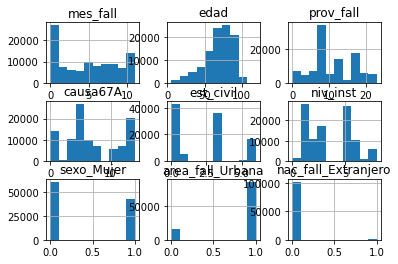

In [74]:
X.hist()

In [75]:
y

,etnia
1,1
2,3
3,3
4,3
7,3
...,...
116512,3
116513,3
116514,3
116515,1


array([[<AxesSubplot:title={'center':'etnia'}>]], dtype=object)

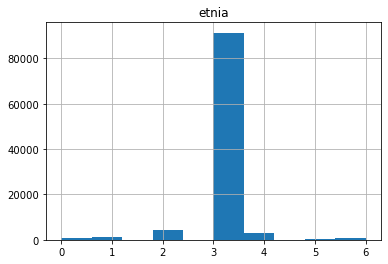

In [76]:
y.hist()

In [77]:
# Five-fold cross-validation of the decision tree classifier
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.20, random_state=1)

#treeClassifier = DecisionTreeClassifier(random_state=0) #no se especifica ninguna profundidad
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X, y)

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.827', '0.830', '0.828', '0.832', '0.827']
Accuracy: 0.829 (+/- 0.004)
Accuracy: 0.829 (+/- 0.002)


## Exportación del modelo

In [78]:
# Model persistence
output_model_file = 'model.pkl'

In [79]:
# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(treeClassifier, f)

## Evaluación del modelo guardado

In [80]:
# Load the model
with open(output_model_file, 'rb') as f:
    treeClassifier_model = pickle.load(f)

In [81]:
# Perform prediction on test data
y_test_pred_new = treeClassifier_model.predict(valid_X)
print("\nMean absolute error =", round(sm.mean_absolute_error(valid_y, y_test_pred_new), 2))


Mean absolute error = 0.02


## Predicciones

In [82]:
# create a tkinter root window
vent = tk.Tk()
vent.title("Proyecto IA")
vent.geometry("640x550")

comboMes = ttk.Combobox(state="readonly",
                        values=['Abril', 'Agosto', 'Diciembre', 'Enero', 'Febrero', 'Julio','Junio', 'Marzo', 'Mayo', 'Noviembre', 
                                'Octubre', 'Septiembre'])
lblMes = Label(vent, text = "Mes de fallecimiento: ")
lblMes.grid(row=0, column=1, padx=6, pady=6, sticky=W, ipady=6)
comboMes.grid(row=0, column=2, padx=6, pady=6)

lblEdad = Label(vent, text="Edad: ")
lblEdad.grid(row=1, column=1, padx=6, pady=6, sticky=W, ipady=6)
txtEdad = Entry(vent)
txtEdad.grid(row=1, column=2, padx=6, pady=6)

comboProvincia = ttk.Combobox(state="readonly",
                              values=['Azuay', 'Bolívar', 'Carchi', 'Cañar', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas', 'Galapagos', 'Guayas', 
                  'Imbabura', 'Loja', 'Los Ríos', 'Manabí', 'Morona Santiago', 'Napo', 'Orellana', 'Pastaza', 'Pichincha', 'Santa Elena',
                  'Santo Domingo de los Tsáchilas', 'Sucumbíos', 'Tungurahua','Zamora Chinchipe'])
lblProvincia = Label(vent, text="Provincia fallecimiento: ")
lblProvincia.grid(row=2, column=1, padx=6, pady=6, sticky="w", ipady=6)
comboProvincia.grid(row=2, column=2, padx=6, pady=6)

comboCausa = ttk.Combobox(state="readonly",
                        values=['001 Ciertas enfermedades infecciosas y parasitarias',
       '016 Tumores [neoplasias]',
       '020 Enfermedades de la sangre y de los órganos hematopoyéticos-y ciertos trastornos que afectan el mecanismo de la in',
       '023 Enfermedades endocrinas-nutricionales y metabólicas',
       '026 Enfermedades del sistema nervioso',
       '030 Enfermedades del sistema circulatorio',
       '031 Enfermedades del sistema respiratorio',
       '035 Enfermedades del sistema digestivo',
       '036 Enfermedades del sistema genitourinario',
       '049 Malformaciones congénitas-deformidades y anomalías cromosómicas',
       '056 Síntomas-signos y hallazgos anormales',
       '059 Todas las demás enfermedades',
       '060 Causas externas de morbilidad y de mortalidad',
       'U071 COVID-19-Virus identificado',
       'U072 COVID-19-Virus no identificado'], width=75)
lblCausa = Label(vent, text="Causa: ")
lblCausa.grid(row=3, column=1, padx=6, pady=6, sticky="w", ipady=6)
comboCausa.grid(row=3, column=2, padx=6, pady=6)

comboEstCivil = ttk.Combobox(state="readonly",
                             values=['Casado/a', 'Divorciado/a', 'Separado/a', 'Soltero/a','Unión de hecho', 'Unión libre', 'Viudo/a'])
lblEstCivil = Label(vent, text="Estado civil: ")
lblEstCivil.grid(row=4, column=1, padx=6, pady=6, sticky=W, ipady=6)
comboEstCivil.grid(row=4, column=2, padx=6, pady=6)

comboNvlInstruc = ttk.Combobox(state="readonly",
                             values=['Centro de alfabetización', 'Educación Básica','Educación Media / Bachillerato', 
                                     'Ninguno', 'Postgrado','Primaria', 'Secundaria', 'Superior no universitario',
                                     'Superior universitario'], width = 25)
lblNvlInstruc = Label(vent, text="Nivel de instrucción: ")
lblNvlInstruc.grid(row=5, column=1, padx=6, pady=6, sticky=W, ipady=6)
comboNvlInstruc.grid(row=5, column=2, padx=6, pady=6)

comboSexo = ttk.Combobox(state="readonly",
                         values=['Masculino', 'Femenino'])
lblSexo = Label(vent, text="Sexo: ")
lblSexo.grid(row=6, column=1, padx=6, pady=6, sticky=W, ipady=6)
comboSexo.grid(row=6, column=2, padx=6, pady=6)

comboAreaFallecimiento = ttk.Combobox(state="readonly",
                         values=['Urbana','Rural'])
lblSexo = Label(vent, text="Area Fallecimiento: ")
lblSexo.grid(row=7, column=1, padx=6, pady=6, sticky=W, ipady=6)
comboAreaFallecimiento.grid(row=7, column=2, padx=6, pady=6)

comboNacionalidad = ttk.Combobox(state="readonly",
                         values=['Extranjero', 'Ecuatoriana'])
lblNacionalidad = Label(vent, text="Nacionalidad: ")
lblNacionalidad.grid(row=8, column=1, padx=6, pady=6, sticky=W, ipady=6)
comboNacionalidad.grid(row=8, column=2, padx=6, pady=6)

def Predecir():
    meses=['Abril', 'Agosto', 'Diciembre', 'Enero', 'Febrero', 'Julio',
       'Junio', 'Marzo', 'Mayo', 'Noviembre', 'Octubre', 'Septiembre']
    provincias = ['Azuay', 'Bolívar', 'Carchi', 'Cañar', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas', 'Galapagos', 'Guayas', 
                  'Imbabura', 'Loja', 'Los Ríos', 'Manabí', 'Morona Santiago', 'Napo', 'Orellana', 'Pastaza', 'Pichincha', 'Santa Elena',
                  'Santo Domingo de los Tsáchilas', 'Sucumbíos', 'Tungurahua','Zamora Chinchipe']  
    causas = ['001 Ciertas enfermedades infecciosas y parasitarias',
       '016 Tumores [neoplasias]',
       '020 Enfermedades de la sangre y de los órganos hematopoyéticos-y ciertos trastornos que afectan el mecanismo de la in',
       '023 Enfermedades endocrinas-nutricionales y metabólicas',
       '026 Enfermedades del sistema nervioso',
       '030 Enfermedades del sistema circulatorio',
       '031 Enfermedades del sistema respiratorio',
       '035 Enfermedades del sistema digestivo',
       '036 Enfermedades del sistema genitourinario',
       '049 Malformaciones congénitas-deformidades y anomalías cromosómicas',
       '056 Síntomas-signos y hallazgos anormales',
       '059 Todas las demás enfermedades',
       '060 Causas externas de morbilidad y de mortalidad',
       'U071 COVID-19-Virus identificado',
       'U072 COVID-19-Virus no identificado']
    civiles=['Casado/a', 'Divorciado/a', 'Separado/a', 'Soltero/a','Unión de hecho', 'Unión libre', 'Viudo/a']
 
    niveles=['Centro de alfabetización', 'Educación Básica','Educación Media / Bachillerato', 'Ninguno', 'Postgrado','Primaria', 
             'Secundaria', 'Superior no universitario','Superior universitario']
    i=0
    find=False
    mes = comboMes.get()
    for dato in meses:
        if dato==mes:
            mes=i
            find=True
            break
        i += 1
    
    i=0
    find=False
    provincia = comboProvincia.get()
    for dato in provincias:
        if dato==provincia:
            provincia=i
            find=True
            break
        i += 1 
 
    i=0
    find=False
    causa = comboCausa.get()
    for dato in causas:
        if dato==causa:
            causa=i
            find=True
            break
        i += 1 

    i=0
    find=False
    civil=comboEstCivil.get()
    for dato in civiles:
        if dato==civil:
            civil=i
            find=True
            break
        i += 1  

    i=0
    find=False
    nivel = comboNvlInstruc.get()
    for dato in niveles:
        if dato==nivel:
            nivel=i
            find=True
            break
        i += 1

    sexo = comboSexo.get()
    if(sexo=="Masculino"):
        sexo=0
    else:
        sexo=1 

    area = comboAreaFallecimiento.get()
    if(area=="Urbana"):
        area=1
    else:
        area=0

    nacionalidad = comboNacionalidad.get()
    if(nacionalidad == "Extranjero"):
        nacionalidad = 1
    else:
        nacionalidad = 0

    inputs = np.expand_dims([mes,int(txtEdad.get()), provincia, causa,civil,nivel,sexo,area,nacionalidad], 0)
    prediction = treeClassifier_model.predict(inputs)
    predictionValue = np.squeeze(prediction, -1)

    if predictionValue == 0:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Afroecuatoriano (a) /Afrodescendiente")
    elif predictionValue == 1:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Blanco (a)")
    elif predictionValue == 2:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Indígena")
    elif predictionValue == 3:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Mestizo (a)")
    elif predictionValue == 4:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Montubio (a)")
    elif predictionValue == 5:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Mulato  (a)")
    elif predictionValue == 6:
        tk.messagebox.showinfo("Predicción: ",  "Es probable que la persona fallecida pertenezca a la Etnia: Negro (a)")
    else:
        tkinter.messagebox.showinfo("Error ",  "Revisar valores ingresados al modelo y volver a intentar")

# Create a Button
btn1 = Button(vent, text="Predecir", command=Predecir, height=5, width=10)
btn1.grid(row=9, column=1, padx=6, pady=6, ipady=4, ipadx=10)

vent.mainloop() 